In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/'
pheno_fin_LOAD = pd.read_csv(path +'pheno_fin_LOAD.tsv',sep = '\t')
pheno_fin = pd.read_csv(path +'pheno_fin.tsv',sep = '\t')
pc = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/somalier_sites/ADSP_ancestry.somalier-ancestry.tsv', sep = '\t')
pc = pc.iloc[:, list(range(3)) + list(range(8, 28))]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
pc = pc.iloc[:, list(range(3)) + list(range(8, 28))]
pc

,#sample_id,predicted_ancestry,given_ancestry,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,HG03024,AFR,AFR,-57.1244,-15.5867,0.3668,-0.7956,1.1232,3.1330,-2.6522,...,4.2747,-2.5299,3.1812,1.2841,-3.4771,-0.8304,-1.3492,-0.0852,-3.3981,-4.3668
1,HG03989,SAS,SAS,-3.4169,-8.0777,-18.3960,5.2947,0.6507,0.5332,2.8448,...,-0.3935,-1.1964,1.5120,0.3713,0.3862,2.4936,-1.0532,-1.9070,0.3047,-1.8013
2,HG00288,EUR,EUR,0.5037,6.6254,4.4412,-7.2907,-8.8783,12.2221,2.9393,...,-1.0164,2.5130,0.9369,1.3992,-1.3644,-2.9874,3.9088,4.3411,-2.0442,-3.3233
3,HG00452,EAS,EAS,6.0371,-42.1095,2.2301,-7.3283,2.5008,0.8181,1.8681,...,4.6637,1.8552,-1.0838,3.1277,1.0592,1.8828,1.9511,-0.9552,-4.9159,-0.5227
4,NA18505,AFR,AFR,-60.4508,-18.2441,2.4410,-1.6334,-1.2299,2.1148,1.6595,...,-1.4987,1.2189,3.3470,-2.6567,-1.2742,0.3046,-2.6027,-0.4172,-2.8857,-3.1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38860,P-UPN-PSP8545-UNK-UPN-109928,EUR,NaN,-0.3690,10.5755,5.6409,-9.4390,-2.0534,1.6253,1.2576,...,-1.0127,-0.0982,2.1108,-0.8282,-0.9417,0.3289,-0.0650,1.1460,1.1265,-3.4897
38861,P-WZB-PSP10181-UNK-UPN-S0042010BB,EUR,NaN,-1.8499,9.5161,6.8853,-8.1455,0.5501,1.5328,0.5026,...,0.1930,-0.9280,1.1670,0.5811,-2.0298,2.7827,-0.4329,-0.0713,-0.1936,-3.0145
38862,P-WZB-PSP10182-UNK-UPN-S0352010B,EUR,NaN,-3.5335,11.4394,4.4196,-7.3469,0.3404,2.1332,1.9011,...,-0.1641,-1.5436,-0.5025,0.2802,0.7105,-1.3436,-0.4406,1.4578,-2.0903,-2.5649
38863,P-WZB-PSP5049-UNK-UPN-S17704MuK350,EUR,NaN,-0.7107,10.3314,4.6117,-7.0454,-2.2937,2.8891,0.0550,...,0.1983,-0.5878,2.2242,0.2357,0.3036,-1.3296,-0.1305,1.2851,-0.6433,-3.8102


In [3]:
pheno_pc = pheno_fin.merge(pc, left_on="SampleID", right_on="#sample_id")
pheno_pc = pheno_pc.drop(['#sample_id'], axis = 1)
pheno_pc.to_csv(path+'pheno_1000k.tsv', sep = '\t', index = False)
pheno_pc.shape

(26334, 37)

In [54]:
pheno_pc[pheno_pc.Age>= 65]
#pheno_pc[pheno_pc.Age>= 65].to_csv(path+'pheno_LOAD_1000k.tsv', sep = '\t', index = False)

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2073,ADNI_002_S_2073,1.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,2.6870,-1.1769,-0.5115,-0.0337,1.2445,-1.6332,-1.3144,1.0681,-0.9179,-2.7834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26320,A-CUHS-CU004510,A-CUHS-CU004510-BL-COL-47848BL1,1.0,0.0,33.0,78,6.0,1.0,CU0150F,Family_based,...,-1.1931,0.7642,0.7214,0.4841,-0.6183,-0.0696,-0.4048,0.7953,-2.1394,-4.2411
26322,A-WRAP-WR000077,A-WRAP-WR000077-BL-NCR-0005966509,1.0,0.0,33.0,65,5.0,0.0,WR1057F,Family_based,...,1.0965,-1.4473,0.9820,0.1842,1.6583,0.1538,-0.3553,1.5898,1.1673,-3.2607
26325,A-CUHS-CU002162,A-CUHS-CU002162-BL-COL-49766BL1,1.0,0.0,34.0,75,6.0,1.0,CU0050F,Family_based,...,0.2989,0.2892,2.0825,1.1393,0.8809,-1.7948,0.6121,1.2356,-1.2393,-2.6366
26327,A-LOAD-LD001488,A-LOAD-LD001488-UNK-NCR-05AD8975,0.0,0.0,44.0,81,5.0,0.0,LD0251F,Family_based,...,0.5672,0.1761,0.5437,1.9351,-0.3045,-0.4138,0.9748,0.6941,-1.3357,-2.2008


## check the ancestry label between the given and the predicted ones

In [4]:
pheno_his = pd.read_csv(path+'pheno_redo_his.tsv', sep = '\t')
pheno_his  = pheno_his.merge(pc, left_on="SampleID", right_on="#sample_id").drop(['#sample_id'], axis = 1)
pheno_his.shape

(26334, 38)

In [9]:
pc

,#sample_id,predicted_ancestry,given_ancestry,EAS_prob,AFR_prob,AMR_prob,SAS_prob,EUR_prob,PC1,PC2,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,HG03024,AFR,AFR,0.0,1.0,0.0000,0.0,0.0000,-57.1244,-15.5867,...,4.2747,-2.5299,3.1812,1.2841,-3.4771,-0.8304,-1.3492,-0.0852,-3.3981,-4.3668
1,HG03989,SAS,SAS,0.0,0.0,0.0000,1.0,0.0000,-3.4169,-8.0777,...,-0.3935,-1.1964,1.5120,0.3713,0.3862,2.4936,-1.0532,-1.9070,0.3047,-1.8013
2,HG00288,EUR,EUR,0.0,0.0,0.0002,0.0,0.9998,0.5037,6.6254,...,-1.0164,2.5130,0.9369,1.3992,-1.3644,-2.9874,3.9088,4.3411,-2.0442,-3.3233
3,HG00452,EAS,EAS,1.0,0.0,0.0000,0.0,0.0000,6.0371,-42.1095,...,4.6637,1.8552,-1.0838,3.1277,1.0592,1.8828,1.9511,-0.9552,-4.9159,-0.5227
4,NA18505,AFR,AFR,0.0,1.0,0.0000,0.0,0.0000,-60.4508,-18.2441,...,-1.4987,1.2189,3.3470,-2.6567,-1.2742,0.3046,-2.6027,-0.4172,-2.8857,-3.1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38860,P-UPN-PSP8545-UNK-UPN-109928,EUR,NaN,0.0,0.0,0.0224,0.0,0.9776,-0.3690,10.5755,...,-1.0127,-0.0982,2.1108,-0.8282,-0.9417,0.3289,-0.0650,1.1460,1.1265,-3.4897
38861,P-WZB-PSP10181-UNK-UPN-S0042010BB,EUR,NaN,0.0,0.0,0.0398,0.0,0.9602,-1.8499,9.5161,...,0.1930,-0.9280,1.1670,0.5811,-2.0298,2.7827,-0.4329,-0.0713,-0.1936,-3.0145
38862,P-WZB-PSP10182-UNK-UPN-S0352010B,EUR,NaN,0.0,0.0,0.0239,0.0,0.9761,-3.5335,11.4394,...,-0.1641,-1.5436,-0.5025,0.2802,0.7105,-1.3436,-0.4406,1.4578,-2.0903,-2.5649
38863,P-WZB-PSP5049-UNK-UPN-S17704MuK350,EUR,NaN,0.0,0.0,0.0299,0.0,0.9701,-0.7107,10.3314,...,0.1983,-0.5878,2.2242,0.2357,0.3036,-1.3296,-0.1305,1.2851,-0.6433,-3.8102


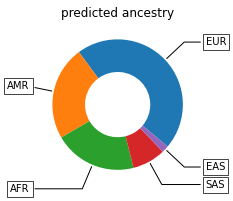

In [30]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))


wedges, texts = ax.pie(pc.predicted_ancestry.value_counts(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(pc.predicted_ancestry.value_counts().index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("predicted ancestry")

plt.show()

EUR    11089
AMR     6751
AFR     5766
SAS     2631
EAS       97
Name: predicted_ancestry, dtype: int64


<AxesSubplot:ylabel='predicted_ancestry'>

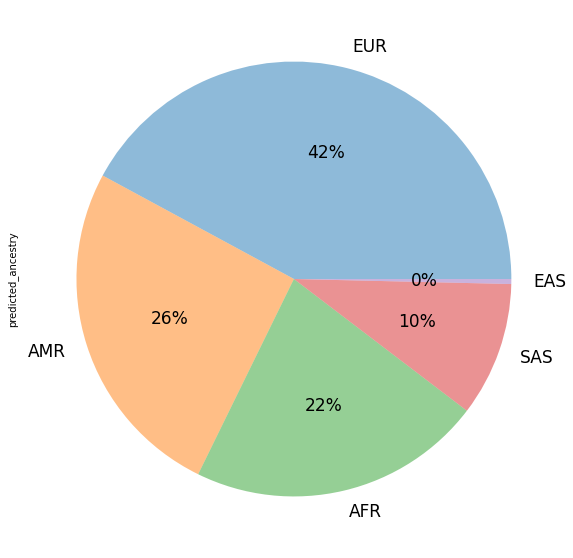

In [77]:
print(pheno_pc.predicted_ancestry.value_counts())
pheno_pc.predicted_ancestry.value_counts(dropna=False).plot.pie(figsize=(10,10), fontsize=17,labels=pheno_pc.predicted_ancestry.value_counts().index,  autopct='%1.0f%%',wedgeprops={"alpha": 0.5})

NaN    36361
AFR      661
EAS      504
EUR      503
SAS      489
AMR      347
Name: given_ancestry, dtype: int64
NaN    26334
Name: given_ancestry, dtype: int64


<AxesSubplot:ylabel='given_ancestry'>

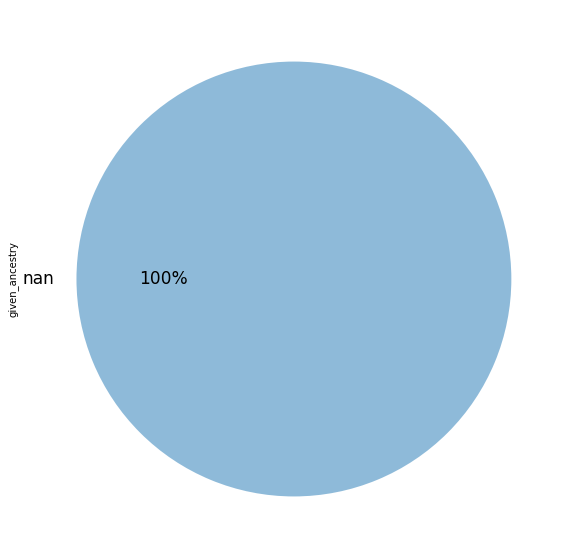

In [80]:
print(pc.given_ancestry.value_counts(dropna=False))
print(pheno_pc.given_ancestry.value_counts(dropna=False))
pheno_pc.given_ancestry.value_counts(dropna=False).plot.pie(figsize=(10,10), fontsize=17,  autopct='%1.0f%%',labels=pheno_pc.given_ancestry.value_counts(dropna=False).index,wedgeprops={"alpha": 0.5})

In [74]:
pheno_his.given_ancestry.value_counts(dropna=False)  ## all the given ancetry are NaN

NaN    26334
Name: given_ancestry, dtype: int64

In [127]:
check = pheno_his.loc[pheno_his.predicted_ancestry!= pheno_his.fin_population_temp][["SUBJID",'Race','Ethnicity','predicted_ancestry','given_ancestry', 'fin_population_temp']]
print(check.shape)

(7000, 6)


Text(0.5, 1.0, 'Fin_population temp')

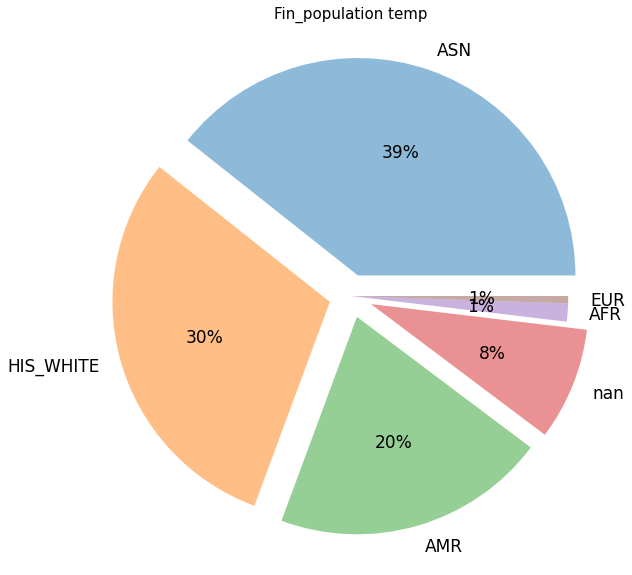

In [133]:
ax = check.fin_population_temp.value_counts(dropna=False).plot.pie(figsize=(10,10), fontsize=17,  autopct='%1.0f%%',wedgeprops={"alpha": 0.5},explode = (0.1, 0.1, 0.1, 0.1, 0, 0))
ax.yaxis.set_visible(False)
ax.set_title('Fin_population temp', fontsize=15)



In [86]:
print(check.loc[(check.fin_population_temp != check.predicted_ancestry) & check.fin_population_temp.isna()].shape) ##only 586
check.loc[(check.fin_population_temp != check.predicted_ancestry) & check.fin_population_temp.isna()].predicted_ancestry.value_counts()

(586, 6)


EUR    491
AMR     67
AFR     18
EAS      6
SAS      4
Name: predicted_ancestry, dtype: int64

In [116]:
check = check.loc[(check.fin_population_temp != check.predicted_ancestry) & (check.fin_population_temp.isna()==False)]

In [113]:
print(check.loc[check.fin_population_temp== 'HIS_WHITE'].shape)
check.loc[check.fin_population_temp== 'HIS_WHITE'].predicted_ancestry.value_counts() ## EAS AND ASN

(2101, 6)


AMR    1680
EUR     333
AFR      87
EAS       1
Name: predicted_ancestry, dtype: int64

In [117]:
check.loc[(check.fin_population_temp == 'ASN') &( check.predicted_ancestry == 'EAS')] ## EAS AND ASN ## 79

,SUBJID,Race,Ethnicity,predicted_ancestry,given_ancestry,fin_population_temp
206,ADNI_029_S_0878,2.0,0.0,EAS,NaN,ASN
211,ADNI_029_S_4279,2.0,0.0,EAS,NaN,ASN
224,ADNI_031_S_4476,2.0,0.0,EAS,NaN,ASN
483,ADNI_109_s_4531,2.0,0.0,EAS,NaN,ASN
541,ADNI_127_S_0684,2.0,0.0,EAS,NaN,ASN
...,...,...,...,...,...,...
25522,G-LSID-LS002519,2.0,0.0,EAS,NaN,ASN
25639,G-LSID-LS002641,2.0,0.0,EAS,NaN,ASN
25651,G-LSID-LS002655,2.0,0.0,EAS,NaN,ASN
25698,G-LSID-LS002705,2.0,0.0,EAS,NaN,ASN


In [118]:
check.loc[(check.fin_population_temp == 'ASN')].predicted_ancestry.value_counts()

SAS    2626
EAS      79
AMR      40
AFR       6
EUR       3
Name: predicted_ancestry, dtype: int64

In [126]:
check.loc[(check.fin_population_temp == 'AMR')].predicted_ancestry.value_counts()

AFR    1209
EUR     213
EAS       5
Name: predicted_ancestry, dtype: int64

In [140]:
check.loc[(check.fin_population_temp == 'AMR') & (check.predicted_ancestry == 'AFR')].Race.value_counts(dropna=False)

6.0    1204
NaN       5
Name: Race, dtype: int64

In [143]:
check.loc[(check.fin_population_temp == 'AMR')& (check.predicted_ancestry == 'AFR')].Ethnicity.value_counts(dropna=False)

1.0    1209
Name: Ethnicity, dtype: int64

In [145]:
check.loc[(check.fin_population_temp == 'HIS_WHITE')& (check.predicted_ancestry == 'AFR')].Race.value_counts(dropna=False)

5.0    87
Name: Race, dtype: int64

In [146]:
check.loc[(check.fin_population_temp == 'HIS_WHITE')& (check.predicted_ancestry == 'AFR')].Ethnicity.value_counts(dropna=False)

1.0    87
Name: Ethnicity, dtype: int64